In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlineretail/OnlineRetail.csv


In [2]:
#Loading libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset 
online = pd.read_csv('../input/onlineretail/OnlineRetail.csv',  engine='python')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#Adding columns: invoice_value,Year, Month, Day and Date to online dataframe
online['invoice_value'] = online['Quantity']*online['UnitPrice']
online['Year'] = pd.DatetimeIndex(online['InvoiceDate']).year
online['Month'] = pd.DatetimeIndex(online['InvoiceDate']).month
online['Day'] =  pd.DatetimeIndex(online['InvoiceDate']).day
online['Date'] = pd.DatetimeIndex(online['InvoiceDate']).date
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_value,Year,Month,Day,Date
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20,2011,12,9,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60,2011,12,9,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2011,12,9,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2011,12,9,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,14.85,2011,12,9,2011-12-09


In [5]:
#Monthly revenue is sum up all 'invoice_value' in a month
monthly = online.groupby(['Year', 'Month'])['invoice_value'].sum()
monthly = monthly.to_frame()
monthly = monthly.set_index(pd.Index(monthly.index))

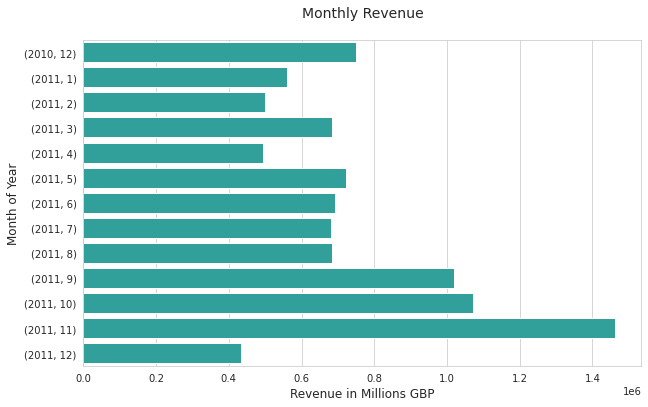

In [6]:
#Plotting the monthly revenue
sns.set_style('whitegrid')
h = sns.barplot(x = 'invoice_value', y = monthly.index, data = monthly, color = 'lightseagreen')
h.figure.set_size_inches(10, 6)
h.set_xlabel('Revenue in Millions GBP', size = 12)
h.set_ylabel('Month of Year', size = 12)
h.set_title('Monthly Revenue', size = 14, y = 1.05)
plt.show()

In [7]:
#Revenue by countries is sum up of all 'invoice_value' for each country.
revenue_per_country = online.groupby(['Country'])['invoice_value'].sum().sort_values(ascending=False)
revenue_per_country = revenue_per_country.to_frame()
revenue_per_country.head()

,invoice_value
Country,
United Kingdom,8.187806e+06
Netherlands,2.846615e+05
EIRE,2.632768e+05
Germany,2.216982e+05
France,1.974039e+05


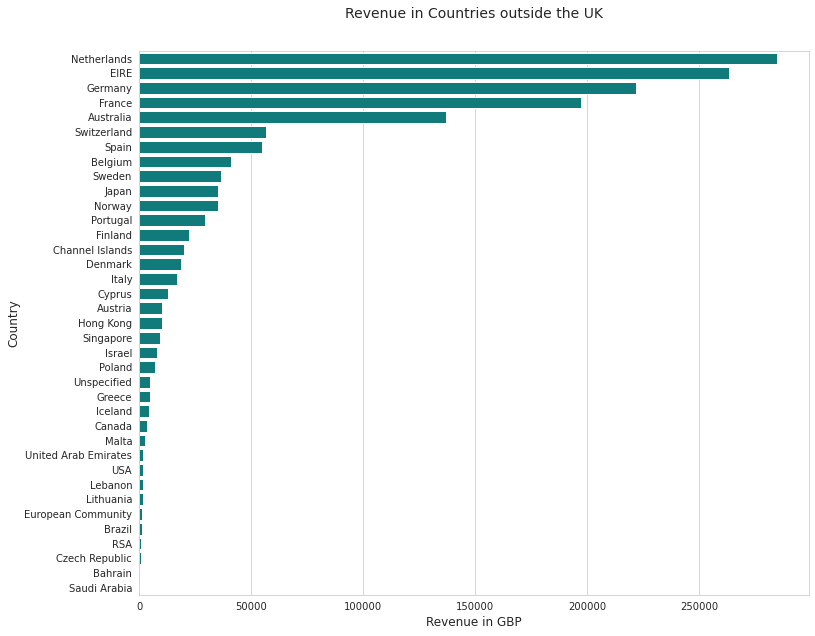

In [8]:
#Plotting countries revenue. As the domestic revenue is 30 times higher than the 2nd highest foreign market - Netherlands, 
#So we exclude the UK from our chart, to see the values in other countries. 

#Excuding the UK from the dataset
country = revenue_per_country[revenue_per_country.index != 'United Kingdom']

#Plotting 

g = sns.barplot(x = 'invoice_value', y = country.index , data = country, color = 'darkcyan')
g.figure.set_size_inches(12, 10)
g.set_xlabel('Revenue in GBP', size = 12)
g.set_ylabel('Country', size = 12)
g.set_title('Revenue in Countries outside the UK', size = 14, y = 1.05)
plt.show()

In [9]:
#The total revenue 
rev = online['invoice_value'].sum()
print('Total revenue of the business represented in the dataset is', np.round(rev,0), ' GBP')

Total revenue of the business represented in the dataset is 9747748.0  GBP


### An overview of the dataset and the business
The dataset recorded sales transactions from 1/12/2010 to 9/12/2011, 12 months and 9 days. The total revenue for all recorded time is 9,74 million GBP(assumption),  for the last 9 days of the dataset is about 0.42 million GBP, so annual income for this business recorded is 9.3 million GBP. 

Nov is the busiest month with the highest earnings, following by October and September. Revenue from earlier months of the year was much lower than later months. 

With only 9 days in Dec 2011, revenue reached 0.42 million GBP, from my prediction, it could get up to 1.5 million by the end of the month due to holiday season. If that prediction is accurate, the earnings of Dec 2011 would be doubled of Dec the previous year. Another assumption is, this was a new business. 

The foreign market of the business is surrounding European countries and Australia (!). However, it only took 8.5% total revenue of the company.

For further analysis, I will exclude Dec 2011 from the dataset

In [10]:
#Excluding Dec, 2011 
df1 = online[(online['Year']==2010)]
df2 = online[(online['Month']!=12)]
df = pd.concat([df1,df2])


In [11]:
#Groupping revenue per invoice 
invoice = df.groupby(['Month','InvoiceNo'])['invoice_value'].sum()
invoice = invoice.to_frame()
invoice = invoice.reset_index()

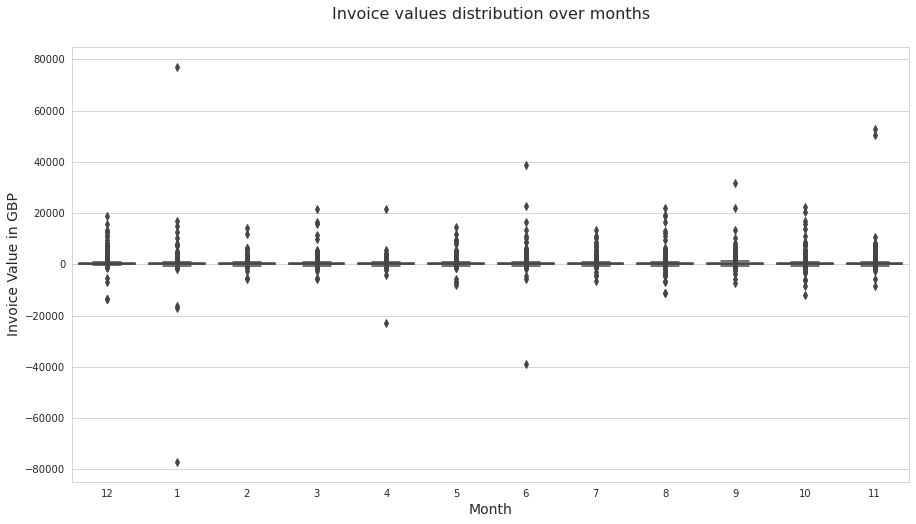

In [12]:
#Plotting the invoice distribution for each month
g = sns.boxplot(x = 'Month',y= 'invoice_value', data = invoice, order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
g.set_title('Invoice values distribution over months', size = 16, y = 1.05)
g.set_xlabel('Month', size = 14)
g.set_ylabel('Invoice Value in GBP', size = 14)
g.figure.set_size_inches(15, 8)
plt.show()

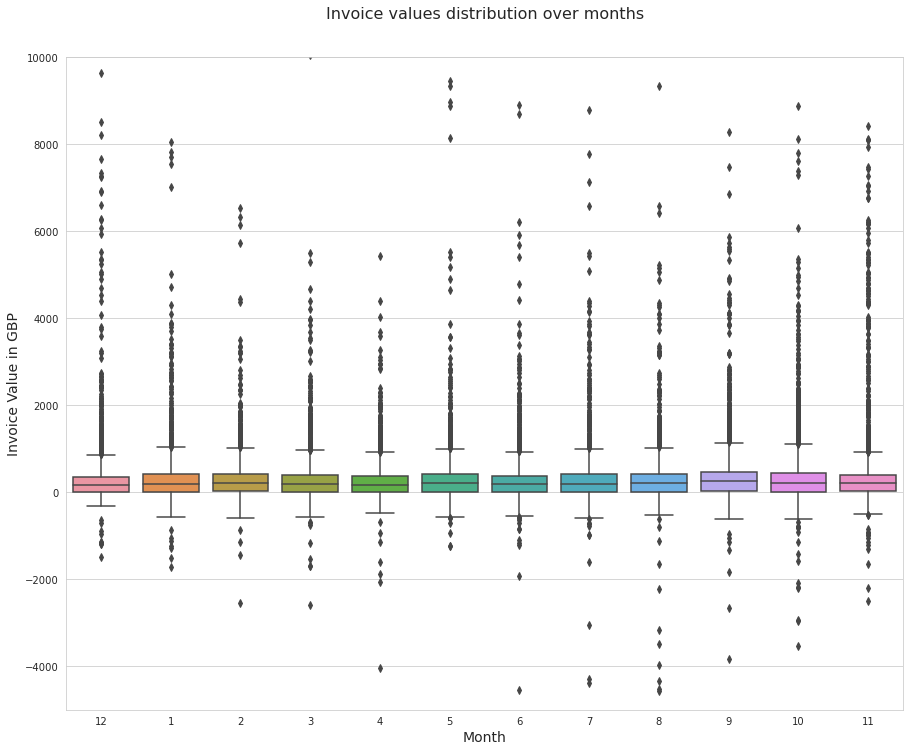

In [13]:
#There are big outliners in pervious plots, so we will slice into the smaller range with more density value
g = sns.boxplot(x = 'Month',y= 'invoice_value', data = invoice, order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
g.set_title('Invoice values distribution over months', size = 16, y = 1.05)
g.set_xlabel('Month', size = 14)
g.set_ylabel('Invoice Value in GBP', size = 14)
g.figure.set_size_inches(15, 12)
g.set_ylim(-5000, 10000)
plt.show()

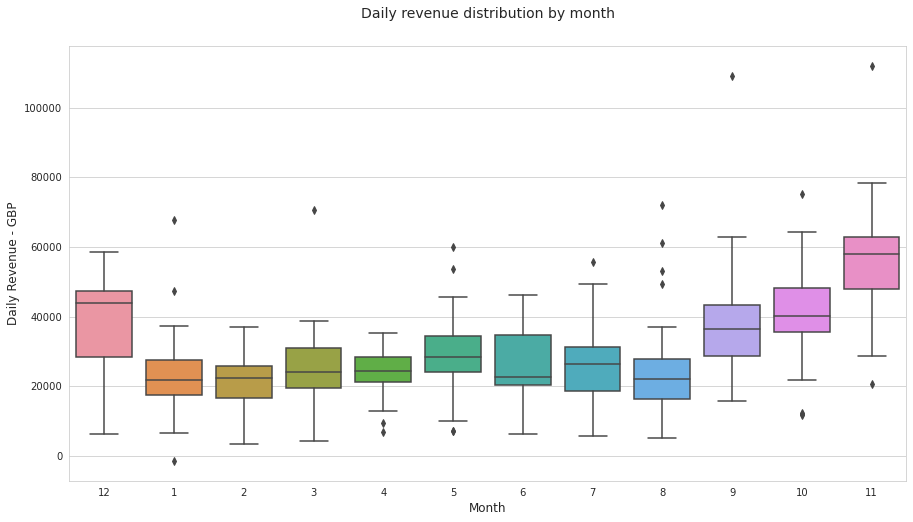

In [14]:
#Groupping revenue by day
daily = df.groupby(['Month', 'Day'])['invoice_value'].sum()
daily = daily.to_frame()
daily = daily.reset_index()

#Plotting daily revenue distribution over months
g = sns.boxplot(x = 'Month',y= 'invoice_value', data = daily, order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
g.figure.set_size_inches(15, 8)
g.set_title('Daily revenue distribution by month', size = 14, y = 1.05)
g.set_ylabel('Daily Revenue - GBP', size = 12)
g.set_xlabel('Month', size = 12)
plt.show()

### Customer Analysis

The first boxplot shows that dataset has numbers of extreme outliners. It looks like there were a couple of big contracts (or input mistakes) they were likely to make but then got cancelled. 

Many of other outliners dropped to the range of 20K GBP, which is way larger than an average bill of any normal person to buy for their home. In other words, they do business with other business as well. 

Zooming into the smaller range (The 2nd boxplot), the number of outliners still significant. Even though the invoice values are not much varied over months, but the daily revenue distribution over months (Box plot 3rd) are significantly different from months to months. Concretely, these outliners have effected strongly on daily income. There is not enough data to conclude, but I can predict that B2B had a big impact on this business. Taking good care of them would be the core strategy. 

### Calculating CLTV

There are multiple methods to calculate CLTV to use in specific purposes. For this business and the dataset available, I will estimate CLTV by the granular formula, which is driven by how frequency a customer purchases with the business, what are their average value per purchase and the estimate customer lifespan. 

Customer lifespan is a critical metric which heavily depended on the business model itself. When it comes to customer lifespan, it’s important to understand the difference between being a contractual and non-contractual business. Most online-stores are non-contractual businesses, it means, when a transaction is made, it is effectively over. From this article of https://www.shopify.ca/blog/customer-lifetime-value, I estimate the life-span of customer for this business is 24 months. 

In [15]:
#Granular CLTV Calculation 

#Calculate average revenue per invoice 
revenue_per_purchase = online.groupby(['InvoiceNo'])['invoice_value'].mean().mean()

#Calculate average number unique invoices per customer per month
freg = online.groupby(['CustomerID', 'Month'])['InvoiceNo'].nunique().mean()

#Define customer life-spand to 24 months
lifespand_months = 24

#Calculate granular CLV
cltv_granular = revenue_per_purchase*freg*lifespand_months

# Print granular CLV value
print('Average granular CLV is {:.1f} USD'.format(cltv_granular))

Average granular CLV is 804.4 USD


In [16]:
#Using Linear Regression to predict next month's purchase
#Inspecting for sales distribution by months
df2.groupby(['Month']).size()

Month
1     35147
2     27707
3     36748
4     29916
5     37030
6     36874
7     39518
8     35284
9     50226
10    60742
11    84711
dtype: int64

In [17]:
df2['Date'] = pd.to_datetime(df2['Date'])

#Exclude target variable
online_X=df2[df2['Month']!= 11] 

# Define the snapshot date
NOW = pd.datetime(2011,11,1)

# Calculate recency by subtracting current date from the latest InvoiceDate
features = online_X.groupby('CustomerID').agg({
  'Date': lambda x: (NOW - x.max()).days,
  # Calculate frequency by counting unique number of invoices
  'InvoiceNo': pd.Series.nunique,
  # Calculate monetary value by summing all spend values
  'invoice_value': np.sum,
  # Calculate average and total quantity
  'Quantity': ['mean', 'sum']}).reset_index()

# Rename the columns
features.columns = ['CustomerID', 'recency', 'frequency', 'monetary', 'quantity_avg', 'quantity_total']
features.info()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838 entries, 0 to 3837
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      3838 non-null   float64
 1   recency         3838 non-null   int64  
 2   frequency       3838 non-null   int64  
 3   monetary        3838 non-null   float64
 4   quantity_avg    3838 non-null   float64
 5   quantity_total  3838 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 180.0 KB


In [18]:
#Build pivot table with monthly transaction per customer 
cust_month_tx = pd.pivot_table(data = df2, index = ['CustomerID'], 
                              values = 'InvoiceNo', columns = ['Month'], 
                              aggfunc = pd.Series.nunique, fill_value = 0)

cust_month_tx.info

<bound method DataFrame.info of Month       1   2   3   4   5   6   7   8   9   10  11
CustomerID                                            
12346.0      2   0   0   0   0   0   0   0   0   0   0
12347.0      1   0   0   1   0   1   0   1   0   1   0
12348.0      1   0   0   1   0   0   0   0   1   0   0
12349.0      0   0   0   0   0   0   0   0   0   0   1
12350.0      0   1   0   0   0   0   0   0   0   0   0
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
18280.0      0   0   1   0   0   0   0   0   0   0   0
18281.0      0   0   0   0   0   1   0   0   0   0   0
18282.0      0   0   0   0   0   0   0   2   0   0   0
18283.0      2   1   0   1   1   2   2   0   1   1   4
18287.0      0   0   0   0   1   0   0   0   0   2   0

[4197 rows x 11 columns]>

In [19]:
#Flat the pivot table
flattened = pd.DataFrame(cust_month_tx.to_records())

#Left join Flattened pivot table to the features table on CustomerID
join = features.merge(flattened, on = 'CustomerID')
join

,CustomerID,recency,frequency,monetary,quantity_avg,quantity_total,1,2,3,4,5,6,7,8,9,10,11
0,12346.0,287,2,0.00,0.000000,0,2,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,5,3373.39,13.907143,1947,1,0,0,1,0,1,0,1,0,1,0
2,12348.0,37,3,904.44,77.642857,1087,1,0,0,1,0,0,0,0,1,0,0
3,12350.0,272,1,334.40,11.588235,197,0,1,0,0,0,0,0,0,0,0,0
4,12352.0,34,10,1233.68,4.287500,343,0,1,7,0,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,18280.0,239,1,180.60,4.500000,45,0,0,1,0,0,0,0,0,0,0,0
3834,18281.0,142,1,80.82,7.714286,54,0,0,0,0,0,1,0,0,0,0,0
3835,18282.0,84,2,98.76,8.750000,70,0,0,0,0,0,0,0,2,0,0,0
3836,18283.0,5,11,1235.32,1.652977,805,2,1,0,1,1,2,2,0,1,1,4


In [20]:
#Finalise data preparation and split to train/test

#Store identifier and target variable column names
custid = ['CustomerID']
target = ['11']
#Extract target variable 
Y = join[target]

#Extract features for culumns name
cols = [col for col in features.columns if col not in custid]

#Store features
X = features[cols]

In [21]:
from sklearn.model_selection import train_test_split
#Split data to training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state = 99)

#Print the shape of the datasets
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape )

(2878, 5) (960, 5) (2878, 1) (960, 1)


In [22]:
from sklearn.linear_model import LinearRegression
# Initialize linear regression instance
linreg = LinearRegression()

# Fit the model to training dataset
linreg.fit(train_X, train_Y)

# Predict the target variable for training data
train_pred_Y = linreg.predict(train_X)

# Predict the target variable for testing data
test_pred_Y = linreg.predict(test_X)

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Calculate root mean squared error on training data
rmse_train = np.sqrt(mean_squared_error(train_Y, train_pred_Y))

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(train_Y, train_pred_Y)

# Calculate root mean squared error on testing data
rmse_test = np.sqrt(mean_squared_error(test_Y, test_pred_Y))

# Calculate mean absolute error on testing data
mae_test = mean_absolute_error(test_Y, test_pred_Y)

# Print the performance metrics
print('RMSE train: {}; RMSE test: {}\nMAE train: {}, MAE test: {}'.format(rmse_train, rmse_test, mae_train, mae_test))

RMSE train: 1.1701949844696629; RMSE test: 1.0159673743701567
MAE train: 0.6862575178063991, MAE test: 0.641645526988784


In [24]:
# Import `statsmodels.api` module
import statsmodels.api as sm

# Initialize model instance on the training data
olsreg = sm.OLS(train_Y, train_X)

# Fit the model
olsreg = olsreg.fit()

# Print model summary
print(olsreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                     11   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              930.8
Date:                Wed, 04 Nov 2020   Prob (F-statistic):                        0.00
Time:                        04:12:13   Log-Likelihood:                         -4536.2
No. Observations:                2878   AIC:                                      9082.
Df Residuals:                    2873   BIC:                                      9112.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------